In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [98]:
train = pd.read_csv(r'C:\Users\ArpitKh4101\Downloads\house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv(r'C:\Users\ArpitKh4101\Downloads\house-prices-advanced-regression-techniques/test.csv')

print("Train Shape",train.shape)
print("Test Shape",test.shape)

Train Shape (1460, 81)
Test Shape (1459, 80)


In [99]:
X_train = train.drop({'SalePrice','Id'},axis =1 )
X_test = test.drop('Id', axis=1)
y_train = train['SalePrice']

In [100]:
data = pd.concat([X_train,X_test])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


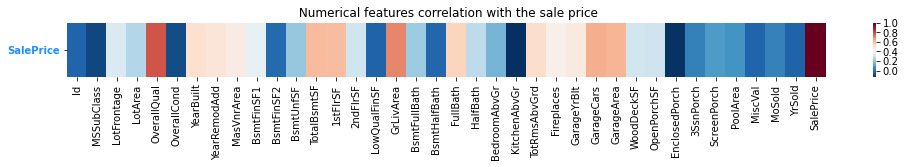

In [45]:
#Correlation between features and target in training set\

corr=train.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='RdBu_r')
plt.title(" Numerical features correlation with the sale price", fontsize=12)
plt.xticks()
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [49]:
# Ten most important features
corr['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [102]:
# Handling missing data and data cleaning

fraction = (data.isnull().mean())
fraction

MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
Length: 79, dtype: float64

In [103]:
# remove coloumns having more than 25% null values
new = data.dropna(thresh=len(data)*0.80, axis=1)
new.shape

(2919, 74)

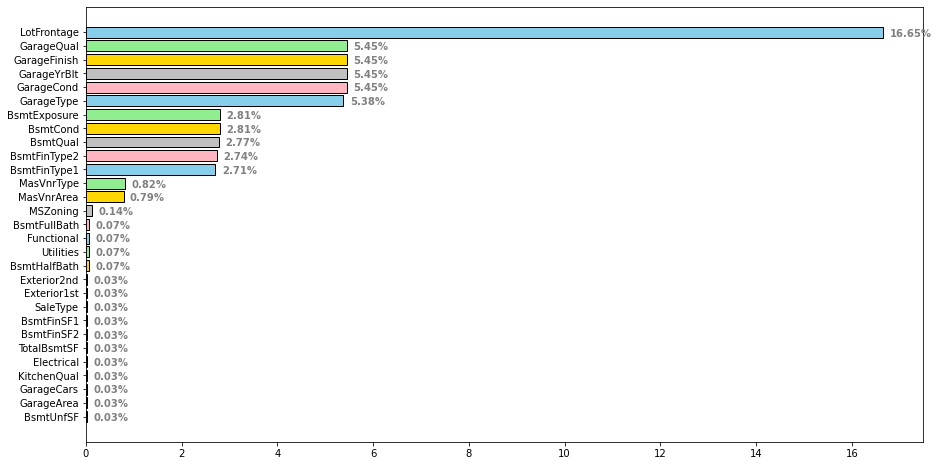

In [111]:
fig, ax = plt.subplots(figsize=(15, 8))
allna = (new.isnull().sum() / len(new))*100
tightout= 0.008*max(allna)
allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black')
for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
plt.show()

allna = (new.isnull().sum() / len(new))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

In [112]:
NA=new[allna.index.to_list()]
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(NAcat.shape[1],'categorical features with missing values')
print(NAnum.shape[1],'numerical features with missing values')

18 categorical features with missing values
11 numerical features with missing values


In [116]:
NAnum.head()

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,150.0,548.0,2.0,856.0,0.0,706.0,0.0,1.0,196.0,2003.0,65.0
1,284.0,460.0,2.0,1262.0,0.0,978.0,1.0,0.0,0.0,1976.0,80.0
2,434.0,608.0,2.0,920.0,0.0,486.0,0.0,1.0,162.0,2001.0,68.0
3,540.0,642.0,3.0,756.0,0.0,216.0,0.0,1.0,0.0,1998.0,60.0
4,490.0,836.0,3.0,1145.0,0.0,655.0,0.0,1.0,350.0,2000.0,84.0


In [123]:
new['MasVnrArea']=new.MasVnrArea.fillna(0)
new['LotFrontage']=new.LotFrontage.fillna(new.LotFrontage.median())
new['GarageYrBlt']=new["GarageYrBlt"].fillna(new.GarageYrBlt.median())
new = new.fillna(0)

In [124]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
NAcat1

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [126]:
fill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']

for col in new[fill_cols]:
    new[col] = new[col].fillna(method='ffill')

In [127]:
NAcols=new.columns
for col in NAcols:
    if new[col].dtype == "object":
        new[col] = new[col].fillna("None")
        
for col in NAcols:
    if new[col].dtype != "object":
        new[col]= new[col].fillna(0)
        
new.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [128]:
new.shape

(2919, 74)

In [130]:
a = new[:1460]
a.shape

(1460, 74)

In [131]:
b = new[1460:]
b.shape

(1459, 74)

In [134]:
a.to_csv(r'C:\Users\ArpitKh4101\Downloads\house-prices-advanced-regression-techniques/a.csv',index= False)
b.to_csv(r'C:\Users\ArpitKh4101\Downloads\house-prices-advanced-regression-techniques/b.csv',index= False)

In [133]:
y_train.to_csv(r'C:\Users\ArpitKh4101\Downloads\house-prices-advanced-regression-techniques/c.csv')